# Face Detection with OpenCV

In this first example we’ll learn how to apply face detection with OpenCV to single input images.

First we need to import some required libraries

In [1]:
import os
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt

We need to change the path to the path where our model and pictures are.

In [2]:
os.chdir("C:\\Users\\DavorJordačević\\Desktop\\OpenCV Face Detection")

Define parameters:

In [3]:
# DNN stands for OpenCV: Deep Neural Networks
DNN = "TF" # Or CAFFE, or any other suported framework
min_confidence = 0.5 # minimum probability to filter weak detections

---

These files can be downloaded from the Internet, or created and trained manually.

For Caffe:

* res10_300x300_ssd_iter_140000_fp16.caffemodel

* deploy.prototxt

For Tensorflow:

* opencv_face_detector_uint8.pb

* opencv_face_detector.pbtxt

In [4]:
# load our serialized model from disk
print("[INFO] loading model...")

if DNN == "CAFFE":
    modelFile = "res10_300x300_ssd_iter_140000_fp16.caffemodel"
    configFile= "deploy.prototxt"
    
    # Here we need to read our pre-trained neural net created using Caffe
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
else:
    modelFile = "opencv_face_detector_uint8.pb"
    configFile= "opencv_face_detector.pbtxt"
    
    # Here we need to read our pre-trained neural net created using Tensorflow
    net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)
    
print("[INFO] model loaded.")

[INFO] loading model...
[INFO] model loaded.


In [29]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it

'''
    Then we load the image , extract the dimensions, and create a blob.
    The dnn.blobFromImage  takes care of pre-processing which includes setting the
    blob  dimensions and normalization.
'''

image = cv2.imread("test_image3.jpg")
image = cv2.resize(image,(int(500),int(500)))
(h, w) = image.shape[:2]

---
**cv2.dnn.blobFromImage**

This function perform:

* Mean subtraction
* Scaling
* And optionally channel swapping

**Mean subtraction** is used to help combat illumination changes in the input images in our dataset.

Before we even begin training our deep neural network, we first compute the average pixel intensity across all images in the training set for each of the Red, Green, and Blue channels.

This implies that we end up with three variables:

$\mu_R$, $\mu_G$, and $\mu_B$

Typically the resulting values are a 3-tuple consisting of the mean of the Red, Green, and Blue channels, respectively.

When we are ready to pass an image through our network (whether for training or testing), we subtract the mean, \mu, from each input channel of the input image:

R = R - $\mu_R$

G = G - $\mu_G$

B = B - $\mu_B$

We may also have a scaling factor, $\sigma$. The value of $\sigma$ may be the standard deviation across the training set which adds in a normalization:

R = (R - $\mu_R$) / $\sigma$

G = (G - $\mu_G$) / $\sigma$

B = (B - $\mu_B$) / $\sigma$

Function signature:

    blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
    
Where:
* scalefactor  - we can optionally scale our images by some factor. This value defaults to 1.0 (no scaling) 
* size - spatial size that the Convolutional Neural Network expects
* mean - our mean subtraction values
* swapRB -  OpenCV assumes images are in BGR channel order; however, the mean value assumes we are using RGB order. To resolve this discrepancy we can swap the R and B channels in image  by setting this value to True.

In [30]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

---
cv2::dnn::Net Class Reference
This class allows to create and manipulate comprehensive artificial neural networks.

Neural network is presented as directed acyclic graph (DAG), where vertices are Layer instances, and edges specify relationships between layers inputs and outputs.

Each network layer has unique integer id and unique string name inside its network. LayerId can store either layer name or layer id.

This class supports reference counting of its instances, i. e. copies point to the same instance.

In [26]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
# Runs forward pass to compute outputs of layers listed in outBlobNames.
detections = net.forward()
print("[INFO] completed.")

[INFO] computing object detections...
[INFO] completed.


In [41]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
 
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > min_confidence:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

27

---
Now can see output or our program.

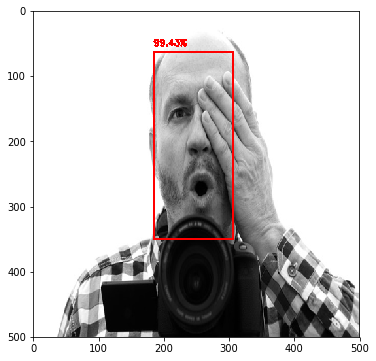

In [28]:
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

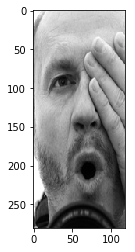

In [51]:
# Here we can extract only deteceted face
newImage = image[startY+2:endY-2, startX+2:endX-2]
plt.imshow(cv2.cvtColor(newImage,cv2.COLOR_BGR2RGB))